In [50]:
## Standard Stuff
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import matplotlib.path as mpath
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
import colorcet as cc
import copy, os

## HEALPix Specific
import easygems.healpix as egh


In [51]:
zoom = 8
in_dir = '/pscratch/sd/w/wcmca1/scream-cess-healpix/monthly/'
in_file = f'{in_dir}monthly_rainmap_by_featuretypes_hp{zoom}_v1.nc'

figdir = '/global/cfs/cdirs/m1867/zfeng/E3SM/SCREAMv1/cess/healpix/figures_featuretypes/'
os.makedirs(figdir, exist_ok=True)

In [3]:
ds_m = xr.open_dataset(in_file)
# ds_m = ds_m.pipe(egh.attach_coords)
# SCREAM period is 2019-08-01 to 2020-08-31, exclude the first month to we have exactly 12 months
# sdate = '2019-09-01T00'
# edate = '2020-08-31T23'
# ds_m = ds_m.sel(time=slice(sdate, edate))
ds_m

<xarray.Dataset> Size: 142MB
Dimensions:                  (time: 3, cell: 786432)
Coordinates:
  * time                     (time) datetime64[ns] 24B 2019-10-01 ... 2019-12-01
  * cell                     (cell) int64 6MB 0 1 2 3 ... 786429 786430 786431
    lat                      (cell) float64 6MB ...
    lon                      (cell) float64 6MB ...
    crs                      int64 8B ...
Data variables: (12/14)
    precipitation            (time, cell) float32 9MB ...
    ntimes                   (time) float32 12B ...
    mcs_precipitation        (time, cell) float32 9MB ...
    mcs_count                (time, cell) float32 9MB ...
    mcs_precipitation_count  (time, cell) float32 9MB ...
    ar_precipitation         (time, cell) float32 9MB ...
    ...                       ...
    tc_precipitation         (time, cell) float32 9MB ...
    tc_count                 (time, cell) float32 9MB ...
    tc_precipitation_count   (time, cell) float32 9MB ...
    etc_precipitation        (time, cell) float32 9MB ...
    etc_count                (time, cell) float32 9MB ...
    etc_precipitation_count  (time, cell) float32 9MB ...
Attributes:
    Title:                    Monthly precipitation statistics by feature type
    contact:                  Zhe Feng, zhe.feng@pnnl.gov
    created_on:               Wed May 14 20:49:30 2025
    grid_type:                HEALPix
    zoom_level:               8
    time_interval:            3.0
    precipitation_threshold:  0.1

In [4]:
# sdate = '2019-09-01T00'
# edate = '2020-08-31T23'
# ds_m.sel(time=slice(sdate, edate))

In [16]:
# Get time interval from attributes
time_interval = float(ds_m.attrs['time_interval'])

# Calculate total hours accounting for time interval
# ntimes is the number of timesteps, multiply by time_interval to get actual hours
ntimes_m = ds_m.ntimes.sum(dim='time').values
nhours_m = ntimes_m * time_interval

# Sum monthly precipitation amount [mm], divided by total hours to get mm/day
totpcp_all_m = 24. * ds_m.precipitation.sum(dim='time') / nhours_m
mcspcp_all_m = 24. * ds_m.mcs_precipitation.sum(dim='time') / nhours_m
arpcp_all_m = 24. * ds_m.ar_precipitation.sum(dim='time') / nhours_m
tcpcp_all_m = 24. * ds_m.tc_precipitation.sum(dim='time') / nhours_m
etcpcp_all_m = 24. * ds_m.etc_precipitation.sum(dim='time') / nhours_m

# Calculate precipitation fractions
mcspcpfrac_all_m = 100. * mcspcp_all_m / totpcp_all_m
arpcpfrac_all_m = 100. * arpcp_all_m / totpcp_all_m
tcpcpfrac_all_m = 100. * tcpcp_all_m / totpcp_all_m
etcpcpfrac_all_m = 100. * etcpcp_all_m / totpcp_all_m

# Calculate number of feature hours - already in hours, no need to convert
mcscount_all_m = ds_m.mcs_count.sum(dim='time')
arcount_all_m = ds_m.ar_count.sum(dim='time')
tccount_all_m = ds_m.tc_count.sum(dim='time')
etcpcpcount_all_m = ds_m.etc_count.sum(dim='time')

mcspcpcount_all_m = ds_m.mcs_precipitation_count.sum(dim='time')
arpcpcount_all_m = ds_m.ar_precipitation_count.sum(dim='time')
tcpcpcount_all_m = ds_m.tc_precipitation_count.sum(dim='time')
etcpcpcount_all_m = ds_m.etc_precipitation_count.sum(dim='time')

# Calculate feature frequencies (as percentages)
mcsfreq_all_m = 100 * mcscount_all_m / ntimes_m
arfreq_all_m = 100 * arcount_all_m / ntimes_m
tcfreq_all_m = 100 * tccount_all_m / ntimes_m
etcfreq_all_m = 100 * etcpcpcount_all_m / ntimes_m

mcspcpfreq_all_m = 100 * mcspcpcount_all_m / ntimes_m
arpcpfreq_all_m = 100 * arpcpcount_all_m / ntimes_m
tcpcpfreq_all_m = 100 * tcpcpcount_all_m / ntimes_m
etcpcpfreq_all_m = 100 * etcpcpcount_all_m / ntimes_m

# Feature precipitation intensity (mm/h)
mcspcpintensity_all_m = ds_m.mcs_precipitation.sum(dim='time') / mcspcpcount_all_m
arpcpintensity_all_m = ds_m.ar_precipitation.sum(dim='time') / arpcpcount_all_m
tcpcpintensity_all_m = ds_m.tc_precipitation.sum(dim='time') / tcpcpcount_all_m
etcpcpintensity_all_m = ds_m.etc_precipitation.sum(dim='time') / etcpcpcount_all_m

<Figure size 640x480 with 0 Axes>

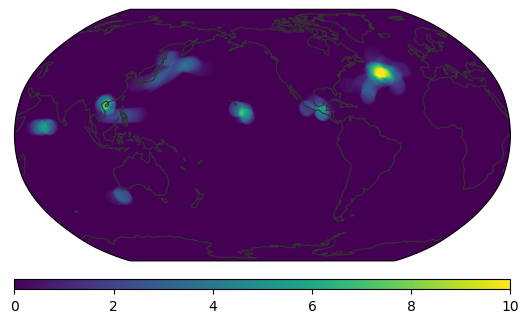

In [24]:
# Var = mcsfreq_all_m
# Var = arfreq_all_m
# Var = etcfreq_all_m
Var = tcfreq_all_m
# im = egh.healpix_show(mcspcpfrac_all_m)
im = egh.healpix_show(Var, vmin=0, vmax=10)
plt.colorbar(im, orientation='horizontal', pad=0.05, aspect=50)

<Figure size 640x480 with 0 Axes>

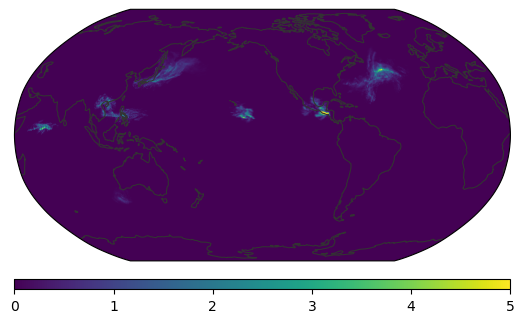

In [13]:
# Var = mcspcp_all_m
# Var = totpcp_all_m
# Var = arpcp_all_m
# Var = etcpcp_all_m
Var = tcpcp_all_m
# im = egh.healpix_show(mcspcpfrac_all_m)
im = egh.healpix_show(Var, vmin=0, vmax=5)
plt.colorbar(im, orientation='horizontal', pad=0.05, aspect=50)

<Figure size 640x480 with 0 Axes>

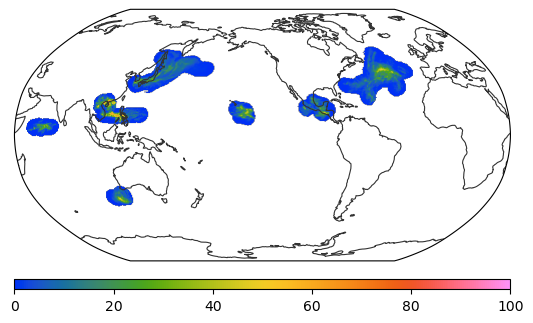

In [30]:
# Var = mcspcpfrac_all_m
# Var = arpcpfrac_all_m
# Var = etcpcpfrac_all_m
Var = tcpcpfrac_all_m
# im = egh.healpix_show(mcspcpfrac_all_m)
im = egh.healpix_show(Var.where(Var > 0), vmin=0, vmax=100, cmap=cc.cm.CET_R1)
plt.colorbar(im, orientation='horizontal', pad=0.05, aspect=50)

In [ ]:
im = egh.healpix_show(mcspcpfrac_all_m)
plt.colorbar(im, orientation='horizontal', pad=0.05, aspect=50)

In [ ]:
# # Annual precipitation difference
# totpcp_all_diff = totpcp_all_m - totpcp_all_o
# mcspcp_all_diff = mcspcp_all_m - mcspcp_all_o

In [31]:
# # Calculate seasonal mean with time interval
# time_interval = float(ds_m.attrs['time_interval'])
# nhours_season_m = ds_m.ntimes.groupby('time.season').sum(dim='time') * time_interval

# # Total precipitation
# totpcp_season_m = 24. * ds_m.precipitation.groupby('time.season').sum(dim='time') / nhours_season_m

# # === MCS (Mesoscale Convective Systems) ===
# # Precipitation
# mcspcp_season_m = 24. * ds_m.mcs_precipitation.groupby('time.season').sum(dim='time') / nhours_season_m
# mcspcpfrac_season_m = 100. * mcspcp_season_m / totpcp_season_m

# # Count hours
# mcscloudhour_season_m = ds_m.mcs_count.groupby('time.season').sum(dim='time')
# mcshour_season_m = ds_m.mcs_precipitation_count.groupby('time.season').sum(dim='time')

# # Frequency
# mcscloudfreq_season_m = 100 * mcscloudhour_season_m / nhours_season_m
# mcspcpfreq_season_m = 100 * mcshour_season_m / nhours_season_m

# # Intensity
# mcspcpintensity_season_m = ds_m.mcs_precipitation.groupby('time.season').sum(dim='time') / mcshour_season_m

# # === AR (Atmospheric Rivers) ===
# # Precipitation
# arpcp_season_m = 24. * ds_m.ar_precipitation.groupby('time.season').sum(dim='time') / nhours_season_m
# arpcpfrac_season_m = 100. * arpcp_season_m / totpcp_season_m

# # Count hours
# arcloudhour_season_m = ds_m.ar_count.groupby('time.season').sum(dim='time')
# arhour_season_m = ds_m.ar_precipitation_count.groupby('time.season').sum(dim='time')

# # Frequency
# arcloudfreq_season_m = 100 * arcloudhour_season_m / nhours_season_m
# arpcpfreq_season_m = 100 * arhour_season_m / nhours_season_m

# # Intensity
# arpcpintensity_season_m = ds_m.ar_precipitation.groupby('time.season').sum(dim='time') / arhour_season_m

# # === TC (Tropical Cyclones) ===
# # Precipitation
# tcpcp_season_m = 24. * ds_m.tc_precipitation.groupby('time.season').sum(dim='time') / nhours_season_m
# tcpcpfrac_season_m = 100. * tcpcp_season_m / totpcp_season_m

# # Count hours
# tccloudhour_season_m = ds_m.tc_count.groupby('time.season').sum(dim='time')
# tchour_season_m = ds_m.tc_precipitation_count.groupby('time.season').sum(dim='time')

# # Frequency
# tccloudfreq_season_m = 100 * tccloudhour_season_m / nhours_season_m
# tcpcpfreq_season_m = 100 * tchour_season_m / nhours_season_m

# # Intensity
# tcpcpintensity_season_m = ds_m.tc_precipitation.groupby('time.season').sum(dim='time') / tchour_season_m

# # === ETC (Extra-Tropical Cyclones) ===
# # Precipitation
# etcpcp_season_m = 24. * ds_m.etc_precipitation.groupby('time.season').sum(dim='time') / nhours_season_m
# etcpcpfrac_season_m = 100. * etcpcp_season_m / totpcp_season_m

# # Count hours
# etccloudhour_season_m = ds_m.etc_count.groupby('time.season').sum(dim='time')
# etchour_season_m = ds_m.etc_precipitation_count.groupby('time.season').sum(dim='time')

# # Frequency
# etccloudfreq_season_m = 100 * etccloudhour_season_m / nhours_season_m
# etcpcpfreq_season_m = 100 * etchour_season_m / nhours_season_m

# # Intensity
# etcpcpintensity_season_m = ds_m.etc_precipitation.groupby('time.season').sum(dim='time') / etchour_season_m

In [32]:
# Calculate seasonal mean with time interval
time_interval = float(ds_m.attrs['time_interval'])
ntimes_season_m = ds_m.ntimes.groupby('time.season').sum(dim='time')  # Number of timesteps per season
nhours_season_m = ntimes_season_m * time_interval  # Convert to hours

# Sum seasonal precipitation amount [mm], divided by total hours to get mm/day
totpcp_season_m = 24. * ds_m.precipitation.groupby('time.season').sum(dim='time') / nhours_season_m

# === MCS (Mesoscale Convective Systems) ===
# Precipitation
mcspcp_season_m = 24. * ds_m.mcs_precipitation.groupby('time.season').sum(dim='time') / nhours_season_m
mcspcpfrac_season_m = 100. * mcspcp_season_m / totpcp_season_m

# Count hours
mcscount_season_m = ds_m.mcs_count.groupby('time.season').sum(dim='time')
mcspcpcount_season_m = ds_m.mcs_precipitation_count.groupby('time.season').sum(dim='time')

# Feature frequencies (as percentages)
mcsfreq_season_m = 100 * mcscount_season_m / ntimes_season_m
mcspcpfreq_season_m = 100 * mcspcpcount_season_m / ntimes_season_m

# Intensity
mcspcpintensity_season_m = ds_m.mcs_precipitation.groupby('time.season').sum(dim='time') / mcspcpcount_season_m

# === AR (Atmospheric Rivers) ===
# Precipitation
arpcp_season_m = 24. * ds_m.ar_precipitation.groupby('time.season').sum(dim='time') / nhours_season_m
arpcpfrac_season_m = 100. * arpcp_season_m / totpcp_season_m

# Count hours
arcount_season_m = ds_m.ar_count.groupby('time.season').sum(dim='time')
arpcpcount_season_m = ds_m.ar_precipitation_count.groupby('time.season').sum(dim='time')

# Feature frequencies (as percentages)
arfreq_season_m = 100 * arcount_season_m / ntimes_season_m
arpcpfreq_season_m = 100 * arpcpcount_season_m / ntimes_season_m

# Intensity
arpcpintensity_season_m = ds_m.ar_precipitation.groupby('time.season').sum(dim='time') / arpcpcount_season_m

# === TC (Tropical Cyclones) ===
# Precipitation
tcpcp_season_m = 24. * ds_m.tc_precipitation.groupby('time.season').sum(dim='time') / nhours_season_m
tcpcpfrac_season_m = 100. * tcpcp_season_m / totpcp_season_m

# Count hours
tccount_season_m = ds_m.tc_count.groupby('time.season').sum(dim='time')
tcpcpcount_season_m = ds_m.tc_precipitation_count.groupby('time.season').sum(dim='time')

# Feature frequencies (as percentages)
tcfreq_season_m = 100 * tccount_season_m / ntimes_season_m
tcpcpfreq_season_m = 100 * tcpcpcount_season_m / ntimes_season_m

# Intensity
tcpcpintensity_season_m = ds_m.tc_precipitation.groupby('time.season').sum(dim='time') / tcpcpcount_season_m

# === ETC (Extra-Tropical Cyclones) ===
# Precipitation
etcpcp_season_m = 24. * ds_m.etc_precipitation.groupby('time.season').sum(dim='time') / nhours_season_m
etcpcpfrac_season_m = 100. * etcpcp_season_m / totpcp_season_m

# Count hours
etccount_season_m = ds_m.etc_count.groupby('time.season').sum(dim='time')
etcpcpcount_season_m = ds_m.etc_precipitation_count.groupby('time.season').sum(dim='time')

# Feature frequencies (as percentages)
etcfreq_season_m = 100 * etccount_season_m / ntimes_season_m
etcpcpfreq_season_m = 100 * etcpcpcount_season_m / ntimes_season_m

# Intensity
etcpcpintensity_season_m = ds_m.etc_precipitation.groupby('time.season').sum(dim='time') / etcpcpcount_season_m

In [33]:
# projection = ccrs.Robinson(central_longitude=225)
# # projection = ccrs.Robinson(central_longitude=0)
# # projection = ccrs.PlateCarree(central_longitude=225)
# fig, ax = plt.subplots(
#     figsize=(10, 6), subplot_kw={"projection": projection}, constrained_layout=True
# )
# ax.set_global()
# # ax.set_extent([0, 360, -60, 60], crs=ccrs.PlateCarree())

# levels = [1,2,3,5,7,10,13,16,20,25,30,40,50]
# cmap = cc.cm.CET_L19
# cmap = copy.copy(mpl.colormaps.get_cmap(cmap))
# norm = colors.BoundaryNorm(boundaries=levels, ncolors=cmap.N)

# # Mask out low values
# Var = mcsfreq_all_m.copy()
# # Var = Var.where(Var > 1)
# # im = egh.healpix_show(Var, ax=ax, cmap='jet')
# # im = egh.healpix_show(Var, ax=ax, vmin=0, vmax=40, cmap=cmap )
# im = egh.healpix_show(Var, ax=ax, norm=norm, cmap=cmap)

# ax.add_feature(cf.COASTLINE, linewidth=0.8)
# ax.add_feature(cf.BORDERS, linewidth=0.4)
# plt.colorbar(im, orientation='vertical', pad=0.05)

In [ ]:
# projection = ccrs.Robinson(central_longitude=225)
# fig, axes = plt.subplots(2, 1,
#     figsize=(10, 6), subplot_kw={"projection": projection}, constrained_layout=True, dpi=200,
# )
# #------------------------------
# ax = axes[0]
# ax.set_global()
# # ax.set_extent([0, 360, -60, 60], crs=ccrs.PlateCarree())

# levels = [1,2,3,5,7,10,13,16,20,25,30,40]
# cmap = cc.cm.CET_L19
# cmap = copy.copy(mpl.colormaps.get_cmap(cmap))
# norm = colors.BoundaryNorm(boundaries=levels, ncolors=cmap.N)

# # Mask out low values
# # Var = mcsfreq_all_m.copy()
# # Var = Var.where(Var > 1)
# im = egh.healpix_show(mcsfreq_all_m, ax=ax, norm=norm, cmap=cmap)
# ax.add_feature(cf.COASTLINE, linewidth=0.8)
# # ax.add_feature(cf.BORDERS, linewidth=0.4)
# plt.colorbar(im, orientation='vertical', pad=0.05)
# ax.set_title('Annual Mean MCS Frequency (Zoom 6)')

# #------------------------------
# ax = axes[1]
# ax.set_global()

# im = egh.healpix_show(mcsfreq_all_m9, ax=ax, norm=norm, cmap=cmap)
# ax.add_feature(cf.COASTLINE, linewidth=0.8)
# ax.set_title('Annual Mean MCS Frequency (Zoom 9)')
# plt.colorbar(im, orientation='vertical', pad=0.05)

In [ ]:
# projection = ccrs.Robinson(central_longitude=225)
# fig, axes = plt.subplots(2, 1,
#     figsize=(10, 6), subplot_kw={"projection": projection}, constrained_layout=True, dpi=200,
# )
# #------------------------------
# ax = axes[0]
# ax.set_global()

# levels = [0.1,0.5,1.0,2,3,5,7,10,13,16,20]
# min_thresh = 0.1
# cmap = cc.cm.rainbow
# cmap = copy.copy(mpl.colormaps.get_cmap(cmap))
# norm = colors.BoundaryNorm(boundaries=levels, ncolors=cmap.N)

# # Mask out low values
# Var = mcspcp_all_m.copy()
# Var = Var.where(Var > min_thresh)
# im = egh.healpix_show(Var, ax=ax, norm=norm, cmap=cmap)
# ax.add_feature(cf.COASTLINE, linewidth=0.8)
# # ax.add_feature(cf.BORDERS, linewidth=0.4)
# plt.colorbar(im, orientation='vertical', pad=0.05, label='MCS Precipitation [mm/day]')
# ax.set_title('Annual Mean MCS Precipitation (Zoom 6)')

# #------------------------------
# ax = axes[1]
# ax.set_global()

# Var = mcspcp_all_m9.copy()
# Var = Var.where(Var > min_thresh)
# im = egh.healpix_show(Var, ax=ax, norm=norm, cmap=cmap)
# ax.add_feature(cf.COASTLINE, linewidth=0.8)
# ax.set_title('Annual Mean MCS Precipitation (Zoom 9)')
# plt.colorbar(im, orientation='vertical', pad=0.05, label='MCS Precipitation [mm/day]')

In [ ]:
# projection = ccrs.Robinson(central_longitude=225)
# fig, axes = plt.subplots(2, 1,
#     figsize=(10, 6), subplot_kw={"projection": projection}, constrained_layout=True, dpi=200,
# )
# #------------------------------
# ax = axes[0]
# ax.set_global()

# levels = np.arange(0, 101, 10)
# cmap = cc.cm.rainbow
# cmap = copy.copy(mpl.colormaps.get_cmap(cmap))
# norm = colors.BoundaryNorm(boundaries=levels, ncolors=cmap.N)
# min_thresh = 1

# # Mask out low values
# Var = mcspcpfrac_all_m.copy()
# Var = Var.where(Var > min_thresh)
# im = egh.healpix_show(Var, ax=ax, norm=norm, cmap=cmap)
# ax.add_feature(cf.COASTLINE, linewidth=0.8)
# # ax.add_feature(cf.BORDERS, linewidth=0.4)
# plt.colorbar(im, orientation='vertical', pad=0.05, label='MCS Precipitation Fraction [%]')
# ax.set_title('Annual Mean MCS Precipitation Fraction (Zoom 6)')

# #------------------------------
# ax = axes[1]
# ax.set_global()

# Var = mcspcpfrac_all_m9.copy()
# Var = Var.where(Var > min_thresh)
# im = egh.healpix_show(Var, ax=ax, norm=norm, cmap=cmap)
# ax.add_feature(cf.COASTLINE, linewidth=0.8)
# ax.set_title('Annual Mean MCS Precipitation Fraction (Zoom 9)')
# plt.colorbar(im, orientation='vertical', pad=0.05, label='MCS Precipitation Fraction [%]')

In [ ]:
# # data
# map_proj = ccrs.Robinson(central_longitude=225)
# egh.healpix_show(data)

In [35]:
# # Set up the figure and projection
# map_proj = ccrs.PlateCarree(central_longitude=225)
# # map_proj = ccrs.Robinson(central_longitude=225)
# # map_proj = ccrs.PlateCarree()
# fig, axes = plt.subplots(2, 2, figsize=(12, 6),
#                          subplot_kw={"projection": map_proj},
#                          constrained_layout=True)
# axes = axes.flatten()  # Flatten to make iteration easier

# # Seasons should appear in the order: DJF, MAM, JJA, SON
# seasons = ['DJF', 'MAM', 'JJA', 'SON']
# vmin, vmax = 0, 30  # Common scale for all plots
# cmap = 'viridis'
# min_thresh = 1

# # Plot each season
# for i, season in enumerate(seasons):
#     ax = axes[i]
#     ax.set_extent([0, 360, -60, 60], crs=ccrs.PlateCarree())
    
#     # Get data for this season
#     data = mcsfreq_season_m.sel(season=season)
    
#     # Optional: mask low values if needed
#     data = data.where(data > min_thresh)
    
#     # Plot using healpix_show
#     im = egh.healpix_show(data, ax=ax, cmap=cmap, vmin=vmin, vmax=vmax)
    
#     # Add map features
#     ax.add_feature(cf.COASTLINE, linewidth=0.8)
#     # ax.add_feature(cf.BORDERS, linewidth=0.4)
#     ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5)
    
#     # Add title for each subplot
#     ax.set_title(season, fontsize=12)

# # Add a colorbar at the bottom
# cbar_ax = fig.add_axes([0.25, 0.05, 0.5, 0.02])  # [left, bottom, width, height]
# cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
# cbar.set_label('MCS Cloud Frequency (%)', fontsize=12)

# plt.suptitle('Seasonal MCS Cloud Frequency', fontsize=16, y=0.98)

In [71]:
def plot_maps_grid(da_list, titles, levels, cmaps, cblabels, cbticks, figname, 
                  min_thresh=None, wspace=None, hspace=None, oob_colors=None, 
                  contourf=False, figsize=None, fontsize=None, cb_fontsize=None, 
                  show_cb2=False, figtitle=None, dpi=200):
    """
    Plot a grid of maps with flexible dimensions
    
    Parameters:
    -----------
    da_list : list of lists
        2D list of xarray DataArrays to plot, dimensions should be [nrow][ncol]
    titles : list of lists
        2D list of titles for each panel, dimensions should be [nrow][ncol]
    levels, cmaps, etc.: can be single values applied to all panels or lists of lists matching da_list
    """
    # Get grid dimensions from input data
    nrow = len(da_list)
    ncol = len(da_list[0]) if nrow > 0 else 0
    
    # Handle case where parameters might be the same for all panels
    def ensure_grid_format(param, param_name):
        if not isinstance(param, list):
            # If single value provided, apply to all panels
            return [[param for _ in range(ncol)] for _ in range(nrow)]
        elif isinstance(param, list):
            if len(param) == 0:
                # Empty list
                return [[[] for _ in range(ncol)] for _ in range(nrow)]
            elif isinstance(param[0], list):
                # Already a list of lists, return as is
                return param
            else:
                # It's a 1D list (like levels=[1,2,3,5,7,10]), use same list for all panels
                return [[param for _ in range(ncol)] for _ in range(nrow)]
        return param
    
    # Ensure all parameters have proper grid format
    cmaps = ensure_grid_format(cmaps, "cmaps")
    levels = ensure_grid_format(levels, "levels")
    cbticks = ensure_grid_format(cbticks, "cbticks")
    
    mpl.rcParams['font.size'] = fontsize
    map_extent = [0, 360, -60, 60]
    proj = ccrs.Robinson(central_longitude=225)
    data_proj = ccrs.PlateCarree()
    resolution = '110m'
    land = cf.NaturalEarthFeature('physical', 'land', resolution)
    ocean = cf.NaturalEarthFeature('physical', 'ocean', resolution)
    borders = cf.NaturalEarthFeature('cultural', 'admin_0_boundary_lines_land', resolution)

    fig = plt.figure(figsize=figsize, dpi=100)
    # Setup two columns (left: plots, right: colorbar)
    gs0 = gridspec.GridSpec(1, 2, figure=fig, height_ratios=[1], width_ratios=[1,0.02], wspace=0.05)
    # Setup panels to the left
    h_ratios = list(np.repeat(1, nrow))
    w_ratios = list(np.repeat(1, ncol))
    gs = gridspec.GridSpecFromSubplotSpec(nrow, ncol, subplot_spec=gs0[0], 
                                         height_ratios=h_ratios, width_ratios=w_ratios, 
                                         wspace=wspace, hspace=hspace)
    
    # Loop over each panel in the grid
    cf1 = None  # Will store the last plot for colorbar
    for row in range(nrow):
        for col in range(ncol):
            # Get panel index
            panel_idx = row * ncol + col
            
            # Create subplot
            ax = plt.subplot(gs[panel_idx], projection=proj)
            ax.set_global()
            ax.add_feature(land, facecolor='none', edgecolor='k', zorder=3)
            ax.set_aspect('auto', adjustable=None)
            
            # Add title
            flabel = ax.text(0.02, 0.92, titles[row][col], transform=ax.transAxes, fontsize=fontsize)
            flabel.set_bbox(dict(facecolor='w', alpha=0.8, edgecolor='w'))
            
            # Add gridlines
            gl = ax.gridlines(crs=proj, draw_labels=False, linestyle='--', linewidth=0.5)
            
            # Get data for this panel
            Var = da_list[row][col]
            
            # Apply minimum threshold if provided
            if min_thresh is not None:
                Var = Var.where(Var > min_thresh)
            
            # Setup colormap
            cmap = copy.copy(mpl.colormaps.get_cmap(cmaps[row][col]))
            
            # Set out-of-bounds colors
            if oob_colors is not None:
                oob_c = oob_colors
                if oob_c is not None:
                    cmap.set_over(oob_c['over'])
                    cmap.set_under(oob_c['under'])
            
            # Create color normalization
            norm = colors.BoundaryNorm(boundaries=levels[row][col], ncolors=cmap.N)
            
            # Plot data
            if not contourf:
                cf1 = egh.healpix_show(Var, ax=ax, cmap=cmap, norm=norm, zorder=2)            
            else:
                cf1 = egh.healpix_contour(Var, ax=ax, norm=norm, cmap=cmap, transform=data_proj, zorder=2)
    
    # Add colorbar (using the last plotted data)
    if cf1 is not None:
        cax = plt.subplot(gs0[1])
        cbar = plt.colorbar(cf1, cax=cax, label=cblabels, ticks=cbticks[row][col], 
                           orientation='vertical', extend='both')
    
    # Add suptitle
    if figtitle:
        fig.suptitle(figtitle, y=0.92)
    
    # Save figure
    fig.savefig(figname, dpi=dpi, bbox_inches='tight', facecolor='w')
    return fig

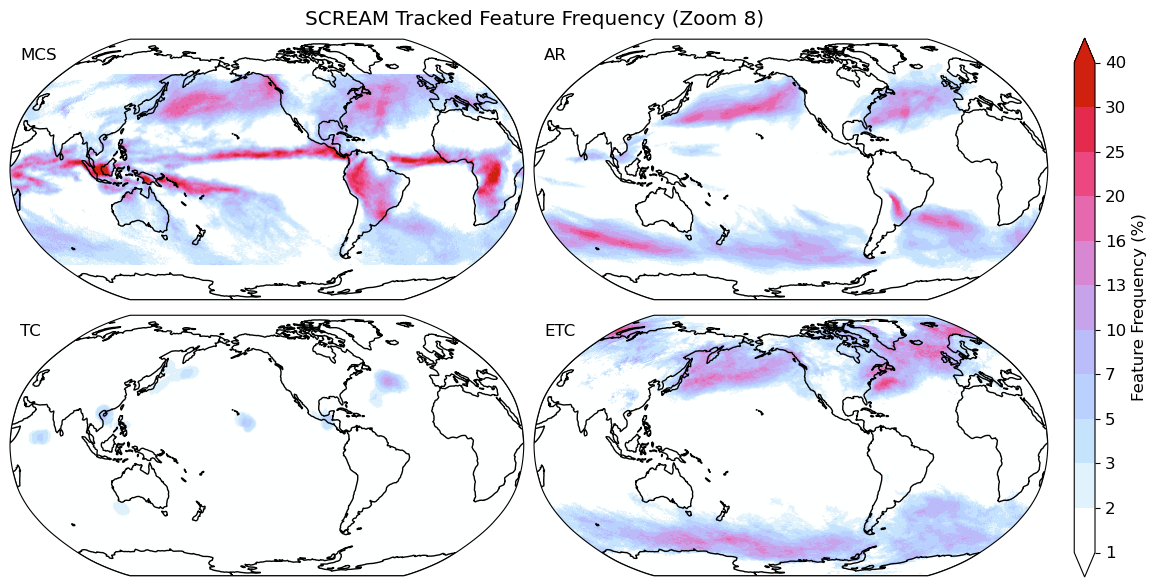

In [ ]:
# Create 2D lists for data and titles
da_list = [
    [mcsfreq_all_m, arfreq_all_m],
    [tcfreq_all_m, etcfreq_all_m]
]
titles = [
    ['MCS', 'AR'],
    ['TC', 'ETC']
]

# Setup grid parameters
nrow = len(da_list)
ncol = len(da_list[0]) if nrow > 0 else 1
figwidth = 14
height_ratio_per_panel = 0.5
figheight = nrow * (figwidth / ncol) * height_ratio_per_panel
figsize = [figwidth, figheight]
fontsize = 12
cb_fontsize = 10
wspace = 0.02
hspace = 0.05
varname1 = 'Feature Frequency'
units = '%'

# Setup levels and colormap
levels = [1,2,3,5,7,10,13,16,20,25,30,40]
min_thresh = None
cmaps = cc.cm.CET_L19
cbticks = levels
oob_colors = None
cblabels = f'{varname1} ({units})'
figname = f'{figdir}globalmap_4features_freq_annual_scream_hp{zoom}.png'

# Plot figure
fig = plot_maps_grid(da_list, titles, levels, cmaps, cblabels, cbticks, figname,
                    figtitle=f'SCREAM Tracked Feature Frequency (Zoom {zoom})',
                    min_thresh=min_thresh, wspace=wspace, hspace=hspace, figsize=figsize,
                    fontsize=fontsize, cb_fontsize=cb_fontsize, contourf=False,
                    oob_colors=oob_colors, show_cb2=False, dpi=200)

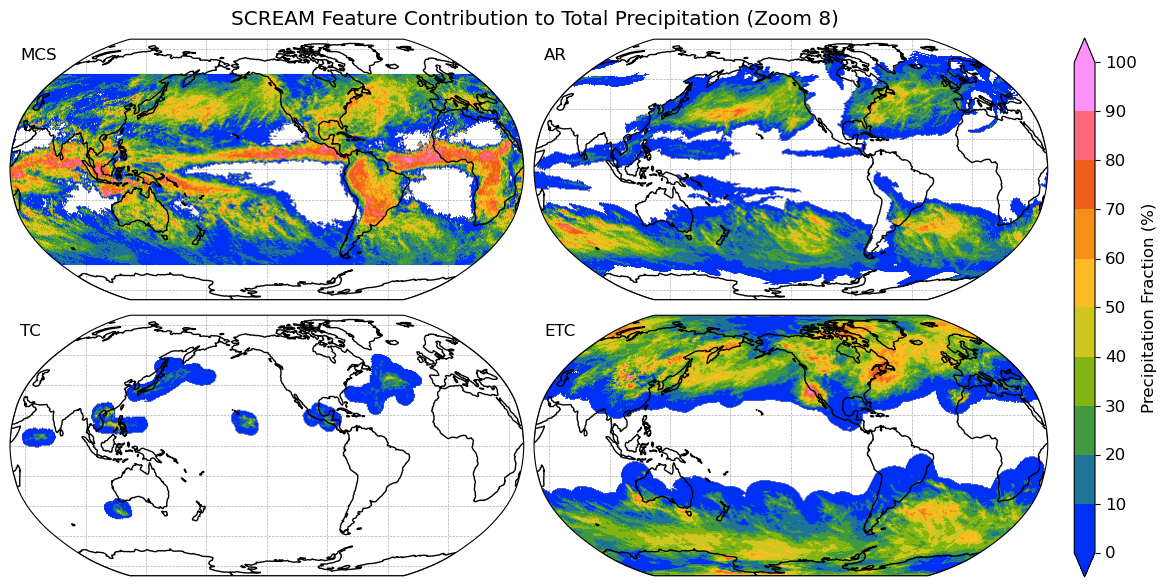

In [ ]:
# Create 2D lists for data and titles
da_list = [
    [mcspcpfrac_all_m.where(mcspcpfrac_all_m > 0), arpcpfrac_all_m.where(arpcpfrac_all_m > 0)],
    [tcpcpfrac_all_m.where(tcpcpfrac_all_m > 0), etcpcpfrac_all_m.where(etcpcpfrac_all_m > 0)]
]
titles = [
    ['MCS', 'AR'],
    ['TC', 'ETC']
]

# Setup grid parameters
nrow = len(da_list)
ncol = len(da_list[0]) if nrow > 0 else 1
figwidth = 14
height_ratio_per_panel = 0.5
figheight = nrow * (figwidth / ncol) * height_ratio_per_panel
figsize = [figwidth, figheight]
fontsize = 12
cb_fontsize = 10
wspace = 0.02
hspace = 0.05
varname1 = 'Precipitation Fraction'
units = '%'
figtitle = f'SCREAM Feature Contribution to Total Precipitation (Zoom {zoom})'

# Setup levels and colormap
levels = np.arange(0, 101, 10)
min_thresh = None
cmaps = cc.cm.CET_R1
cbticks = levels
oob_colors = None
cblabels = f'{varname1} ({units})'
figname = f'{figdir}globalmap_4features_rainfrac_annual_scream_hp{zoom}.png'

# Plot figure
fig = plot_maps_grid(da_list, titles, levels, cmaps, cblabels, cbticks, figname,
                    figtitle=figtitle,
                    min_thresh=min_thresh, wspace=wspace, hspace=hspace, figsize=figsize,
                    fontsize=fontsize, cb_fontsize=cb_fontsize, contourf=False,
                    oob_colors=oob_colors, show_cb2=False)

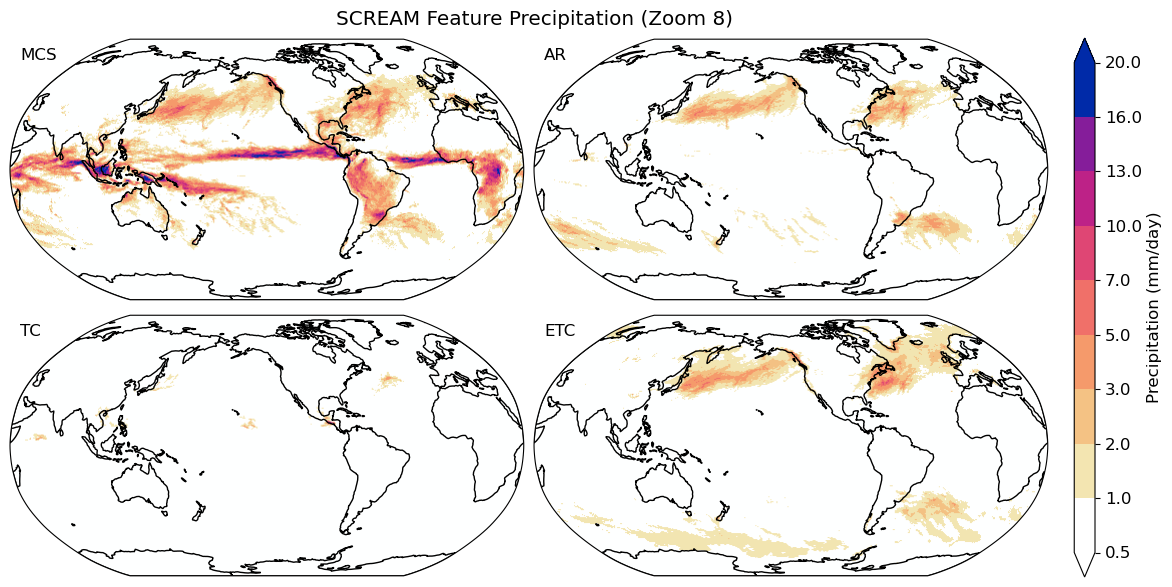

In [69]:
# Create 2D lists for data and titles
da_list = [
    # [mcspcp_all_m.where(mcspcp_all_m > 0), arpcp_all_m.where(arpcp_all_m > 0)],
    # [tcpcp_all_m.where(tcpcp_all_m > 0), etcpcp_all_m.where(etcpcp_all_m > 0)]
    [mcspcp_all_m, arpcp_all_m],
    [tcpcp_all_m, etcpcp_all_m]
]
titles = [
    ['MCS', 'AR'],
    ['TC', 'ETC']
]

# Setup grid parameters
nrow = len(da_list)
ncol = len(da_list[0]) if nrow > 0 else 1
figwidth = 14
height_ratio_per_panel = 0.5
figheight = nrow * (figwidth / ncol) * height_ratio_per_panel
figsize = [figwidth, figheight]
fontsize = 12
cb_fontsize = 10
wspace = 0.02
hspace = 0.05
varname1 = 'Precipitation'
units = 'mm/day'
figtitle = f'SCREAM Feature Precipitation (Zoom {zoom})'

# Setup levels and colormap
levels = [0.5,1,2,3,5,7,10,13,16,20]
min_thresh = None
cmaps = cc.cm.CET_L17
cbticks = levels
oob_colors = None
cblabels = f'{varname1} ({units})'
figname = f'{figdir}globalmap_4features_rain_annual_scream_hp{zoom}.png'

# Plot figure
fig = plot_maps_grid(da_list, titles, levels, cmaps, cblabels, cbticks, figname,
                    figtitle=figtitle,
                    min_thresh=min_thresh, wspace=wspace, hspace=hspace, figsize=figsize,
                    fontsize=fontsize, cb_fontsize=cb_fontsize, contourf=False,
                    oob_colors=oob_colors, show_cb2=False)

In [70]:
figdir

'/global/cfs/cdirs/m1867/zfeng/E3SM/SCREAMv1/cess/healpix/figures_featuretypes/'

### Old

In [66]:
# def plot_maps_nrow(nrow, ncol, da, seasons, titles, levels, cmaps, cblabels, cbticks, figname, min_thresh=None, wspace=None, hspace=None,
#                    oob_colors=None, contourf=False, figsize=None, fontsize=None, cb_fontsize=None, show_cb2=False, figtitle=None):
    
#     mpl.rcParams['font.size'] = fontsize
#     # mpl.rcParams['font.family'] = 'Helvetica'
#     # map_extent = [-180., 179.5, -60.1, 60.1]
#     map_extent = [0, 360, -60, 60]
#     # map_extent = [0, 360, -90, 90]
#     # lonv = np.arange(-180,180.1,30)
#     # latv = np.arange(-60,60.1,15)
#     # proj = ccrs.PlateCarree(central_longitude=0)
#     # proj = ccrs.PlateCarree(central_longitude=225)
#     proj = ccrs.Robinson(central_longitude=225)
#     data_proj = ccrs.PlateCarree()
#     resolution = '110m'
#     land = cf.NaturalEarthFeature('physical', 'land', resolution)
#     ocean = cf.NaturalEarthFeature('physical', 'ocean', resolution)
#     borders = cf.NaturalEarthFeature('cultural', 'admin_0_boundary_lines_land', resolution)
#     levelshgt = [1000,10000]

#     fig = plt.figure(figsize=figsize, dpi=100)
#     # Setup two columns (left: plots, right: colorbar)
#     gs0 = gridspec.GridSpec(1, 2, figure=fig, height_ratios=[1], width_ratios=[1,0.02], wspace=0.05)
#     # Setup panels to the left
#     h_ratios = list(np.repeat(1,nrow))
#     w_ratios = list(np.repeat(1,ncol))
#     gs = gridspec.GridSpecFromSubplotSpec(nrow, ncol, subplot_spec=gs0[0], height_ratios=h_ratios, width_ratios=w_ratios, wspace=wspace, hspace=hspace)
    
#     # Loop over each panel (DataArray dimension 'season')
#     # for pp in range(da.sizes['tracker']):
#     for pp, season in enumerate(seasons):
#         ax = plt.subplot(gs[pp], projection=proj)
#         # ax.set_extent(map_extent, crs=ccrs.PlateCarree())
#         ax.set_global()
#         # ax.set_extent(map_extent, crs=proj)
#         ax.add_feature(land, facecolor='none', edgecolor='k', zorder=3)
#         ax.set_aspect('auto', adjustable=None)
#         # Title
#         flabel = ax.text(0.02, 0.92, titles[pp], transform=ax.transAxes, fontsize=None)
#         flabel.set_bbox(dict(facecolor='w', alpha=0.8, edgecolor='w'))
        
#         # Grid lines & labels
#         gl = ax.gridlines(crs=proj, draw_labels=False, linestyle='--', linewidth=0.5)
#         # gl.xlocator = mpl.ticker.FixedLocator(lonv)
#         # gl.ylocator = mpl.ticker.FixedLocator(latv)         
#         # if (row == nrow-1):
#         #     ax.set_xticks(lonv, crs=data_proj)
#         #     lon_formatter = LongitudeFormatter(zero_direction_label=True)
#         #     ax.xaxis.set_major_formatter(lon_formatter)
#         # ax.set_yticks(latv, crs=data_proj)
#         # lat_formatter = LatitudeFormatter()
#         # ax.yaxis.set_major_formatter(lat_formatter)
        
#         # Terrain height
#         # ct = ax.contour(lon_ter, lat_ter, ter_s, levels=levelshgt, \
#         #                 colors='dimgray', linewidths=0.5, transform=data_proj, zorder=3)
               
#         # Select and mask data source
#         Var = da.sel(season=season).copy()
#         # Var = Var.where(Var > min_thresh)
#         # Var = np.ma.masked_where(np.isnan(Var), Var)
#         cmap = copy.copy(mpl.colormaps.get_cmap(cmaps))
#         # Set out-of-bounds colors
#         if oob_colors is not None:
#             oob_c = oob_colors
#             if oob_c is not None:
#                 cmap.set_over(oob_c['over'])
#                 cmap.set_under(oob_c['under'])
#         norm = colors.BoundaryNorm(boundaries=levels, ncolors=cmap.N)
#         # Plot data
#         if (contourf == False):
#             cf1 = egh.healpix_show(Var, ax=ax, cmap=cmap, norm=norm, zorder=2)            
#         else:
#             cf1 = egh.healpix_contour(Var, ax=ax, norm=norm, cmap=cmap, transform=data_proj, zorder=2)
#     # Colorbar
#     cax = plt.subplot(gs0[1])
#     cbar = plt.colorbar(cf1, cax=cax, label=cblabels, ticks=cbticks, orientation='vertical', extend='both')
#     # Suptitle
#     fig.suptitle(figtitle, y=0.92)
    
#     fig.savefig(figname, dpi=300, bbox_inches='tight', facecolor='w')
#     return fig


In [67]:
# ncol = 2
# seasons = ['DJF', 'MAM', 'JJA', 'SON']
# nseasons = len(seasons)
# nrow = np.ceil(nseasons / ncol).astype(int)

# figwidth = 14
# # height_ratio_per_panel = 0.35
# height_ratio_per_panel = 0.5
# figheight = nrow * (figwidth / ncol) * height_ratio_per_panel
# figsize = [figwidth,figheight]
# fontsize = 12
# cb_fontsize = 10
# wspace = 0.02
# hspace = 0.05
# varname1 = 'MCS Cloud Frequency'
# units = '%'

# # Select variable to plot
# da = mcscloudfreq_season_m
# levels = [1,2,3,5,7,10,13,16,20,25,30,40,50]
# min_thresh = 1
# cmaps = cc.cm.CET_L19
# titles = seasons
# figtitle = f'SCREAM MCS Cloud Frequency (Zoom {zoom})'

# cbticks = levels
# # oob_colors = {'under':'white', 'over':'firebrick'}
# oob_colors = None
# cblabels = f'{varname1} ({units})'
# figname = f'{figdir}globalmap_mcs_cloudfreq_4seasons_scream_hp{zoom}.png'
# figname

# # da.season

# fig = plot_maps_nrow(nrow, ncol, da, seasons, titles, levels, cmaps, cblabels, cbticks, figname, figtitle=figtitle, min_thresh=min_thresh, \
#                      wspace=wspace, hspace=hspace, figsize=figsize, fontsize=fontsize, 
#                      cb_fontsize=cb_fontsize, contourf=False, oob_colors=oob_colors, show_cb2=False)

In [ ]:
# # da.sizes['season']
# for pp, season in enumerate(da.season):
#     # print(pp, season)
#     Var = mcscloudfreq_season_m.isel(season=pp)
#     print(Var.season)
#     # print(pp)
#     # print(seasons[i])
#     # print(da.isel(season=i).data)
#     # print(da.isel(season=i).data.values)
#     # print(da.isel(season=i).data.values[0])
#     # print(da.isel(season=i).data.values[1])
#     # print(da.isel(season=i).data.values[2])
#     # print(da.isel(season=i).data.values[3])
#     # print(da.isel(season=i).data.values[4])

In [ ]:
for pp, season in enumerate(mcscloudfreq_season_m.season):
    # ax = plt.subplot(gs[pp], projection=proj)
    # # ax.set_extent(map_extent, crs=ccrs.PlateCarree())
    # ax.set_global()
    # # ax.set_extent(map_extent, crs=proj)
    # ax.add_feature(land, facecolor='none', edgecolor='k', zorder=3)
    # ax.set_aspect('auto', adjustable=None)
    # Title
    print(pp, titles[pp])
    # flabel = ax.text(0.02, 0.07, titles[pp], transform=ax.transAxes, fontsize=None)